# <center>UV4.2 - Advanced Signal Processing </center>
## <center> Lab 3: DOA estimation </center>
### <center> A. Dremeau & C. Vanwynsberghe - 2021/2022 </center>
### <center> Student name 1 - Student name 2</center>

The goals of this 3 hours lab are the following:
- reproducing some basic properties of a sensor array (directivity pattern & resolution)
- implementing & analyzing beamforming standard approach for Direction of Arrival (*ie* DOA) estimation:

## Problem statement

We consider a DOA problem, in which we try to localize sources from the far field by a Uniform Linear Array (ULA). We set the problem in the frequency domain, at the specific wavelength $\lambda$ (or the frequency $f$ if the wave celerity is known). Here are the following hypotheses:
* the $S$ sources are uncorrelated, and do not move (stationary spatial hypothesis). The $s$-th source has an amplitude $x_s$, and is positioned at angle $\theta_s$.
* the ULA consists of M sensors, regularly spaced by a distance $d$. At one given time indexed by $l$, it measures one realization (called *snapshot*), that is, the vector $\mathbf{y}_l \in \mathbb{C}^{M \times 1}$. The sensors also contains an additive uncorrelated noise with a standard deviation $\sigma = 0.5$. Therefore $\mathbf{n}_l \sim \mathcal{N}_{\mathbb{C}} (\mathbf{0}, \sigma^2 \mathbf{I}_M)$ .

Since the sources are into the far field, the ULA measures the snapshots

$$ \mathbf{y}_l = \sum_{s=1}^{S} x_s \mathbf{a}(\theta_s) + \mathbf{n}_l $$

where $\mathbf{a}(\theta_s) \in \mathbb{C}^{M \times 1}$ is the *steering vector* modeling the plane wave propagation. With this ULA configuration, it writes:
$$ \mathbf{a}(\theta_s) =
\begin{bmatrix}
    1\\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} 1 \sin(\theta_s)) \\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} 2 \sin(\theta_s)) \\
\vdots \\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} m \sin(\theta_s)) \\
    \vdots \\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} (M-1) \sin(\theta_s)) \\
\end{bmatrix}$$

In DOA, we want to estimate the unknown angles $\theta_s$ and amplitudes $x_s$. To do so, we search the sources on a regular grid of $N$ angles $\theta_1, \dots, \theta_n, \dots, \theta_N \in [-\dfrac{\pi}{2}, \dfrac{\pi}{2}]$. Thus we search the vector of sources from these angles: $\mathbf{x} \in \mathbb{C}^{N\times 1}$. The forward model finally writes:

$$\mathbf{y}_l = \mathbf{Ax + n}_l$$

with $\mathbf{A} \in \mathbb{C}^{M \times N}$ the matrix of steering vectors, such that $\mathbf{A} = [\mathbf{a}(\theta_1), \dots, \mathbf{a}(\theta_n), \dots, \mathbf{a}(\theta_N)]$.

## Part I - Properties of the ULA

**For all the lab**, we have:
* M = 64 sensors
* an angle resolution of $\dfrac{\pi}{4}$, *ie* we sample $[-\dfrac{\pi}{2}, \dfrac{\pi}{2}]$ on $N = 4\times180 + 1 = 721$ points.


<div class="alert alert-info">
<h3 class="alert-heading"> Question 1</h3>

Write a code to plot the directivity patterns of the ULA, in dB, for:
* $\theta_0 = 0$ and $\theta_0 = -\dfrac{\pi}{4}$,
* for $d_{norm} = \frac{d}{\lambda}=\dfrac{1}{2}$ (Nyquist limit), $d_{norm} =  \frac{d}{\lambda}= \dfrac{1}{8}$ (oversampled) & $d_{norm} =  \frac{d}{\lambda}=  \dfrac{1}{1.2}$ (undersampled),

We recall that it corresponds to the Beamforming of a source of amplitude $1$ at angle $\theta$ : $DP(\theta) = 20 \log_{10} \left( \dfrac{\mathbf{a}(\theta)^H \mathbf{a}(\theta_0)}{\|\mathbf{a}(\theta)\|^2} \right)$ dB.
</div>

<IPython.core.display.Javascript object>


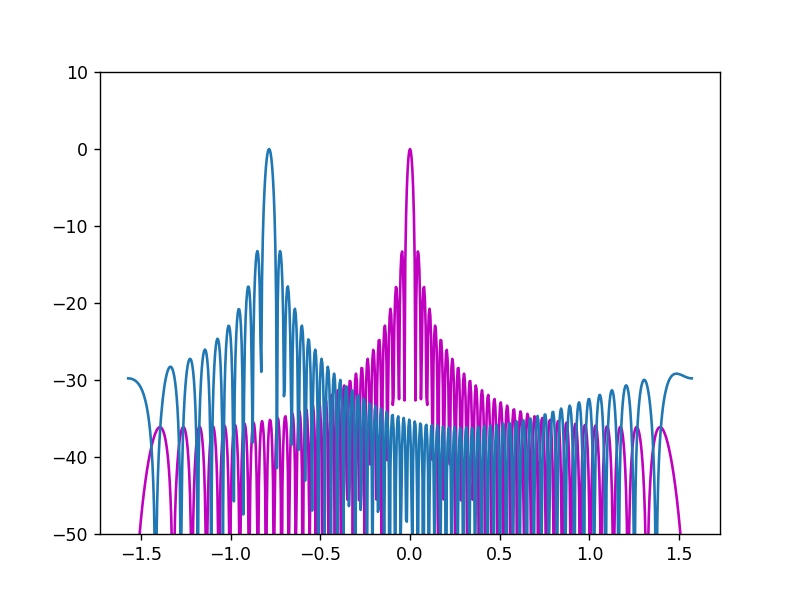

<IPython.core.display.Javascript object>


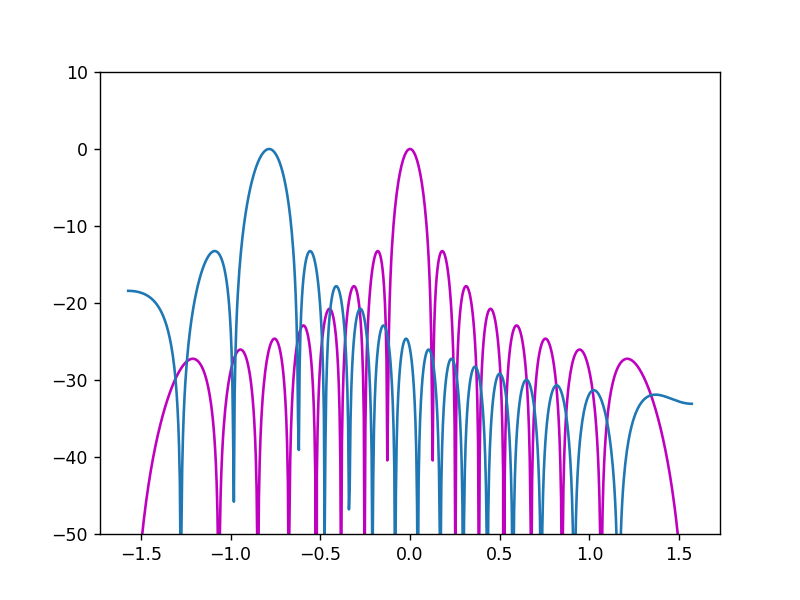

<IPython.core.display.Javascript object>


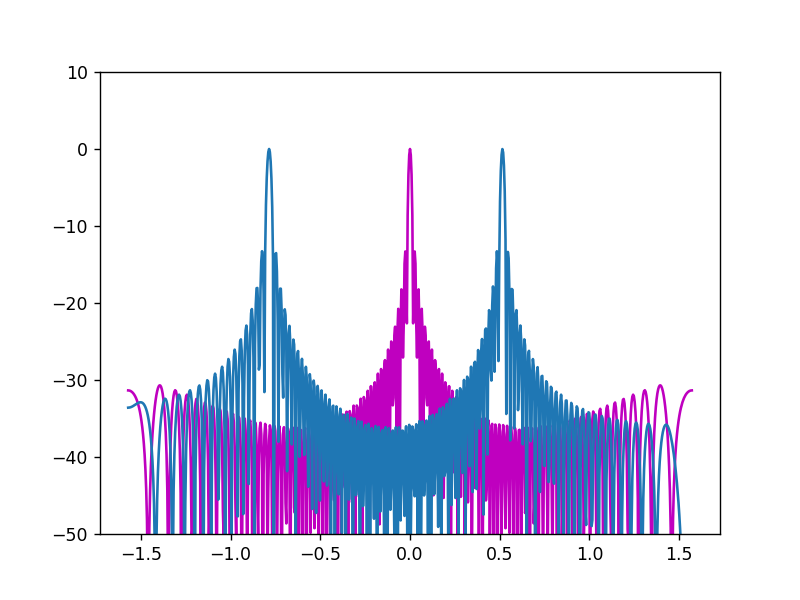

<IPython.core.display.Javascript object>


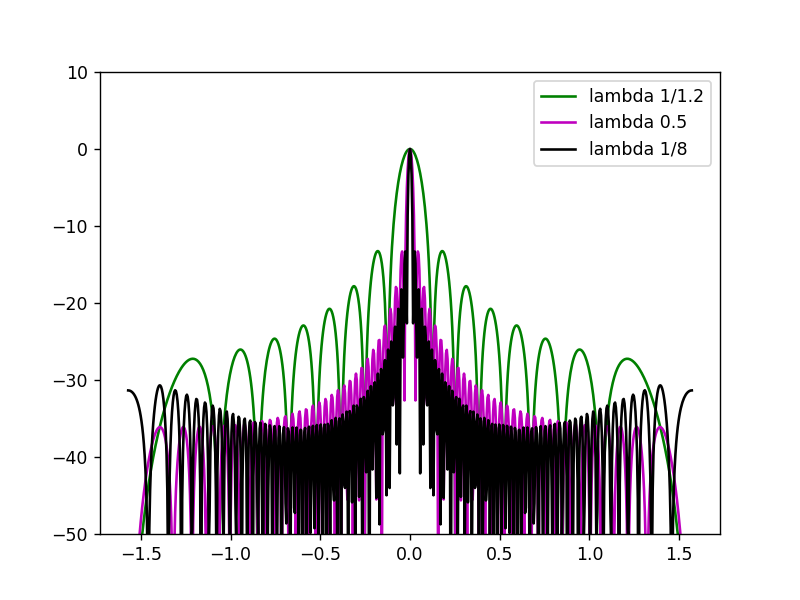

(-50, 10)

In [110]:
# for interactive matplotlib figures, use the command %matplotlib notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

M = 64  #  = norme au carré de a(theta), puisque a(theta) a M = 64 composantes
N = 180*4 + 1
d = 1.0/2.0
d_over = 1.0/8.0
d_under = 1.0/1.2

thetas = np.linspace(-np.pi/2, np.pi/2, N)
d_s = np.zeros ((M,N))
for i in range (M):
    for j in range (N):
        d_s [i,j] = float (i+1)

d_sensors = d*d_s
d_over = d_over*d_s
d_under = d_under*d_s

#print (d_sensors, np.sin(thetas))
lambd = 1.
A_nyquist = np.exp(-2*1j*np.pi/lambd * d_sensors * np.sin(thetas))
A_over = np.exp(-2*1j*np.pi/lambd * d_over * np.sin(thetas))
A_under = np.exp(-2*1j*np.pi/lambd * d_under * np.sin(thetas))

# DP à 0°
DP_0_int = (A_nyquist.T.conj()).dot(A_nyquist[:, N//2]) / M  
#print (A_nyquist, DP_0_int)
DP_0 = 20 * np.log10 (abs(DP_0_int))
# on est à 0° pour la N//2 eme composante
DP_0_int_over = (A_over.T.conj()).dot(A_over[:, N//2]) / M  
DP_0_over = 20 * np.log10 (abs(DP_0_int_over))
DP_0_int_under = (A_under.T.conj()).dot(A_under[:, N//2]) / M  
DP_0_under = 20 * np.log10 (abs(DP_0_int_under))


# DP à -45°
DP_45_int = (A_nyquist.T.conj()) .dot (A_nyquist[:, N//4]) / M
DP_45 = 20 * np.log10 ( abs(DP_45_int))
# on est à -45° pour la N//4 eme composante
DP_45_int_over = (A_over.T.conj()).dot(A_over[:, N//4]) / M  
DP_45_over = 20 * np.log10 (abs(DP_45_int_over))
DP_45_int_under = (A_under.T.conj()).dot(A_under[:, N//4]) / M  
DP_45_under = 20 * np.log10 (abs(DP_45_int_under))

plt.figure()
plt.plot (thetas, DP_0, 'm')
plt.plot (thetas, DP_45)
plt.ylim(-50, 10)

plt.figure()
plt.plot (thetas, DP_0_over, 'm')
plt.plot (thetas, DP_45_over)
plt.ylim(-50, 10)

plt.figure()
plt.plot (thetas, DP_0_under, 'm')
plt.plot (thetas, DP_45_under)
plt.ylim(-50, 10)


plt.figure()
plt.plot (thetas, DP_0_over, 'g', label = "lambda 1/1.2")
plt.plot (thetas, DP_0, 'm', label = "lambda 0.5")
plt.plot (thetas, DP_0_under, 'k', label = "lambda 1/8")
#plt.xlim ([-1.5,1.5])
plt.legend()
plt.ylim(-50, 10)

# plus lanbda est grand, plus les lobes secondaires sont grands  (pas ouf), mais par contre pas de recouvrement

<div class="alert alert-info">
<h3 class="alert-heading"> Question 2</h3>

In the 6 cases (all $\theta_0$ and $\lambda$), compute the angle resolution $\theta_{-3 \text{dB}}$ in rad.
</div>

In [63]:
DPs = [DP_0, DP_0_over, DP_0_under, DP_45, DP_45_over, DP_45_under]

# est ce que c'est la résolution à -3 dB ?
# la résolution est la largeur des lobes principaux.

DPs[-1][N//2:] = -100 # pour enlever le recouvrement de spectre
DPs[-2][N//2:] = -100 # On a pas besoin ici car le recouvrement est pas, enfin si mais ça se recouvre sur la même valeur = 0
# enlever le grating lobe

resolutions_ang = np.array([thetas[DP>=-3].max() - thetas[DP>=-3].min() for DP in DPs]) # on conserve les extrémités de la bande de fréquence
resolutions_ang *= 180./np.pi  # pour avoir les degrés

print (resolutions_ang)

[1.5  6.   0.5  2.   8.75 1.  ]


[ 1.5   6.    0.5   2.    8.75 75.5]
La dernière composante est très grande, normal, car on prend les 2 pics, donc ça fait qqch de très étendu, pas du tout comme le pic.
La résolution est un peu meilleur en 0

<div class="alert alert-info">
<h3 class="alert-heading"> Question 3</h3>
    
In which case do we obtain a grating lobe? And why?
</div>

In [18]:
# Lorsqu'on a undersampling ? Et donc si lambda et très petit

## Part II - DOA estimation

With the same ULA ($M=64$), we want to localize $S = 3$  sources from the far field at angles $\theta_s = -\dfrac{\pi}{9}$, $-\dfrac{\pi}{15}$, $\dfrac{\pi}{3}$, with amplitudes (*resp*) $x_s=1$, $0.2$, and $0.5$. They emit at the wavelength such that $d_{norm} =1/8$.

<div class="alert alert-info">
<h3 class="alert-heading"> Question 4 - Signal generation</h3>

1. Generate $L=512$ measured snapshots $\mathbf{y}_l = \sum_{s=1}^{S} x_s \mathbf{a}(\theta_s) + \mathbf{n}_l $, knowing that:

    * the $3$ sources are uncorrelated, and:
        + the 2 first sources ($\theta_s\in\lbrace -\frac{\pi}{9}, -\frac{\pi}{15}\rbrace$ & $x_s\in\lbrace1, 0.2\rbrace$) are stationary processes following complex centered normal distributions; their respective variances are $x_s^2$;
        + the third source ($\theta_s = \frac{\pi}{3}$ and $x_s = 0.5$) is a BPSK signal taking the values $\{ -x_s; x_s \}$ at random.
    * $\mathbf{n}_l$ is an uncorrelated, circular gaussian distribution with a standard deviation $\sigma=0.5$
    

2. Calculate the SNR (Signal to Noise Ratio), in dB, of the current problem 
</div>

In [106]:
L = 512
S = 3
s_amp = [1., 0.2, 0.5] # intervient dans le s
s_angles = [-np.pi/9.0, -np.pi/15.0, np.pi/3.0] # les angles interviennent dans le A pour faire le A*s + bruit 
sig_n = 0.5

# Generate source signals
# Signaux incohérents suivant la loi complexe normale de variance 1
s_normal_snap = (np.random.randn(S-1, L) + 1j*np.random.randn(S-1, L)) / 2**0.5  # taille des 2 sources à la suite

# Signaux 2-PSK incohérents à la fréquence porteuse f = c0 / wavelength
# pdf is Bernoulli-like (values are 1 or -1)
s_qpsk_snap = np.random.choice([1., -1.], size=(1, L))  # taille de la 3ème source

s_scaled = np.vstack((s_normal_snap, s_qpsk_snap))  # on met les 3 bruits des sources ensembles
s = (np.diag(s_amp)).dot(s_scaled)  # l'amplitude la dedans, et pas dans le A. Normal. Mais pk ici ? 
# c'est la définition du x, il y a les amplitudes de la source dedans, c'est juste précisément ça même
#print (s, s.shape)

d = 1./8.0
lambd = 1.0

d_s = np.zeros ((M,3))
for i in range (M):
    for j in range (3):
        d_s [i][j] = float (i+1)
        
d_sensors_3 = d*d_s

#A_nyquist = np.exp(-2*1j*np.pi/lambd * d_sensors * np.sin(thetas))
A = np.exp(-2*1j*np.pi/lambd * d_sensors_3 * np.sin(s_angles))
noise_snap = sig_n*(np.random.randn(M, L) + 1j*np.random.randn(M, L))/2**0.5 # le bruit de variance 0.5^2 d'après l'énoncé
y_snap = A.dot(s) + noise_snap

# SNR

snr = 10*np.log10 ((np.abs(np.trace(A.dot(s).dot((A.dot(s)).T.conj()))))/ np.abs(np.trace (noise_snap.dot(noise_snap.T.conj()))))

print (snr)

7.133506486403895


<div class="alert alert-info">
<h3 class="alert-heading"> Question 5 - Classical Beamforming</h3>

Implement the Beamforming method on the grid of angles $[\theta_1, \dots, \theta_n, \dots, \theta_N]$. The estimated power $P_{\text{CBF}}(\theta)$ is computed by:

$$ P_{\text{CBF}}(\theta) =  \dfrac{\mathbf{a}(\theta)^H \mathbf{S}_{yy} \mathbf{a}(\theta)}{\|\mathbf{a}(\theta)\|^4} $$

Plot the amplitude $|P_{\text{CBF}}(\theta)|$ on the linear and dB scales, and compare with the ground truth (you may display the linear results by a polar plot, see `matplotlib.pyplot.polar`).
</div>

<IPython.core.display.Javascript object>


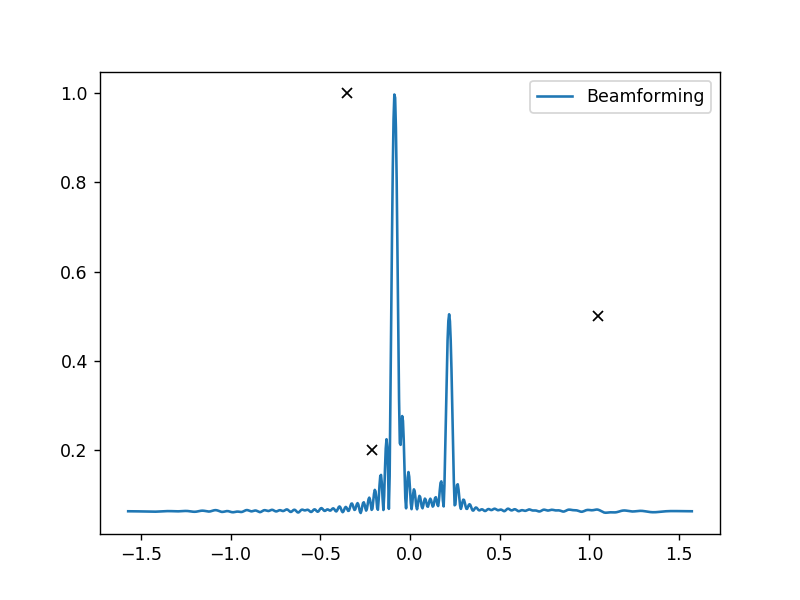

In [113]:
# Compute the sample covariance matrix
Syy = y_snap.dot(y_snap.T.conj()) / L # bien penser à diviser par L

A = np.exp(-2*1j*np.pi/lambd * d_sensors * np.sin(thetas))

P_cbf = ((A.T.conj()).dot(Syy).dot(A)) / (np.diag(A.T.conj().dot(A))**2)

plt.figure()
plt.plot (thetas, np.diag(P_cbf).real**0.5, label = "Beamforming" )
plt.plot (s_angles, s_amp, "xk")
plt.legend()
plt.show()